# 散列函数

散列函数是这样的：

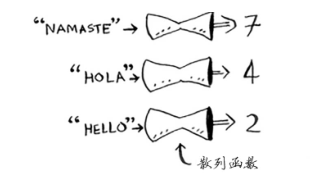

无论你给它什么数据，它都还你一个数字。

如果用专业术语来表达的话，我们会说，散列函数“将输入映射到数字”。你可能认为散列
函数输出的数字没什么规律，但其实散列函数必须满足一些要求：

1. 它必须是一致的。例如，假设你输入apple时得到的是4，那么每次输入apple时，得到的都必须为4。
2. 它应将不同的输入映射到不同的数字。

散列函数将输入映射为数字，这有何用途呢？

首先，创建一个空数组：

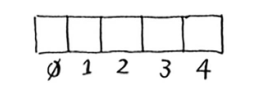

你将在这个数组中存储商品的价格。下面来将苹果的价格加入到这个数组中。为此，将apple
作为输入交给散列函数。

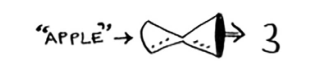

散列函数的输出为3，因此我们将苹果的价格存储到数组的索引3处。

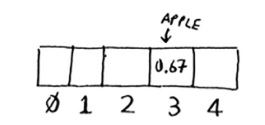

下面将牛奶（milk）的价格存储到数组中。为此，将milk作为散列函数的输入。

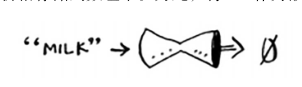

散列函数的输出为0，因此我们将牛奶的价格存储在索引0处。

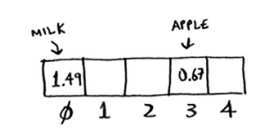

不断地重复这个过程，最终整个数组将填满价格。

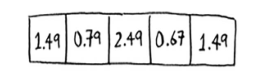

现在假设需要知道鳄梨（avocado）的价格。你无需在数组中查找，只需将avocado作为输入
交给散列函数。

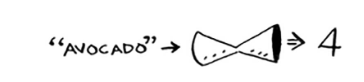

它将告诉你鳄梨的价格存储在索引4处。果然，你在那里找到了。

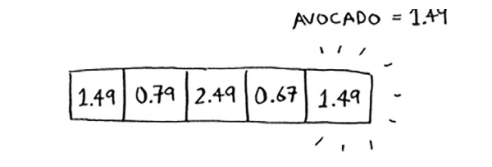

散列函数准确地指出了价格的存储位置，你根本不用查找！之所以能够这样，具体原因如下：
1. 散列函数总是将同样的输入映射到相同的索引。
2. 散列函数将不同的输入映射到不同的索引。
3. 散列函数知道数组有多大，只返回有效的索引。

Python提供的散列表实现为字典，你可使用函数dict来创建散列表。

In [1]:
book = dict()  # 创建一个名为book的字典

book["apple"] = 0.67
book["milk"] = 1.49
book["avocado"] = 1.19

print(book)

{'apple': 0.67, 'milk': 1.49, 'avocado': 1.19}


In [2]:
# 查询apple的价格
print(book["apple"])

0.67


散列表由键和值组成。在前面的散列表book中，键为商品名，值为商品价格。散列表将键映射到值。

# 散列表的各种应用

手机都内置了方便的电话簿，其中每个姓名都有对应的电话号码。

假设你要创建一个类似这样的电话簿，将姓名映射到电话号码。该电话簿需要提供如下功能：
1. 添加联系人及其电话号码。
2. 通过输入联系人来获悉其电话号码。

In [4]:
# 创建一个散列表
phone_book = dict()

# 开始添加一下联系人的电话号码
phone_book["jenny"] = 123456
phone_book["jobs"] = 654321

# 然我们查询一下Jenny的电话号码
print(phone_book["jenny"])

123456


如何防止重复呢？

假设你负责管理一个投票站。显然，每人只能投一票，但如何避免重复投票呢？有人来投票时，你询问他的全名，并将其与已投票者名单进行比对。

如果名字在名单中，就说明这个人投过票了，因此将他拒之门外！否则，就将他的姓名加入到名单中，并让他投票。现在假设有很多人来投过了票，因此名单非常长。

In [9]:
# 首先创建一个散列表
voted = {}

# 然后让我们查看一下Tom是否在voted散列表中
def check_voter(name):
    if voted.get(name):
        print("kick them out!")
    else:
        voted[name] = True
        print("let them vote!")

In [10]:
check_voter("tom")

let them vote!


In [11]:
check_voter("tom")

kick them out!


# 冲突

之前的说法是：散列函数总是将不同的键映射到数组的不同位置。

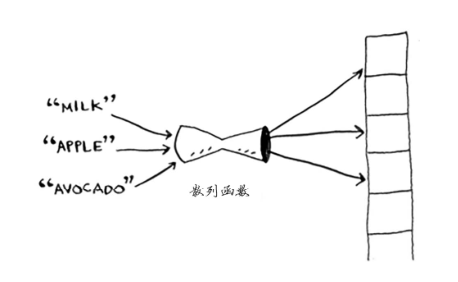

实际上，几乎不可能编写出这样的散列函数。

一个简单的例子：

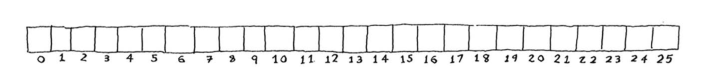

假设我们有这样的一个数组，包含了26个位置。而你使用的散列函数非常简单，它按字母表顺序分配数组的位置。

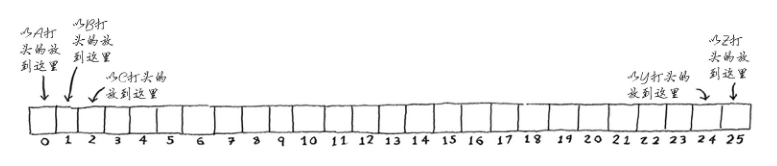

如果你要将苹果的价格存储到散列表中，分配给你的是第一个位置：

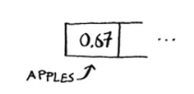

接下来，你要将香蕉的价格存储到散列表中，分配给你的是第二个位置：

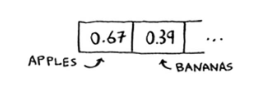

一切顺利！但现在你要将鳄梨的价格存储到散列表中，分配给你的又是第一个位置：

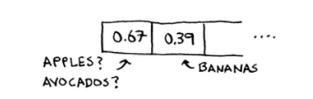

不好，这个位置已经存储了苹果的价格。

这种情况被称为冲突（collision）：给两个键分配的位置相同。

如果你将鳄梨的价格存储到这个位置，将覆盖苹果的价格，以后再查询苹果的价格时，得到的将是鳄梨的价格！冲突很糟糕，必须要避免。

处理冲突的方式很多，最简单的办法如下：如果两个键映射到了同一个位置，就在这个位置存储一个链表。

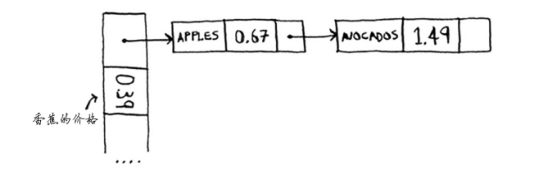

# 性能

在平均情况下，散列表执行各种操作的时间都为O(1)。O(1)被称为常量时间。

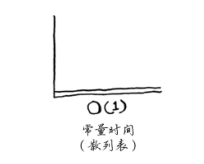

这意味着无论散列表包含一个元素还是10亿个元素，从其中获取数据所需的时间都相同。

在平均情况下，散列表的速度确实很快。在最糟情况下，散列表所有操作的运行时间都为O(n)——线性时间。

在平均情况下，散列表的查找（获取给定索引处的值）速度与数组一样快，而插入和删除速
度与链表一样快，因此它兼具两者的优点！

但在最糟情况下，散列表的各种操作的速度都很慢。因此，在使用散列表时，避开最糟情况至关重要。为此，需要避免冲突。而要避免冲突，需要有：

1. 较低的填装因子
2. 良好的散列函数

散列表的填装因子很容易计算：

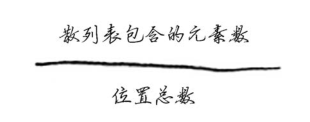

散列表使用数组来存储数据，因此你需要计算数组中被占用的位置数。

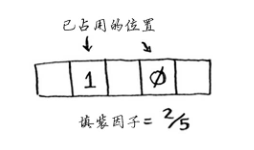

散列表的填装因子为2/5，即0.4。

假设你要在散列表中存储100种商品的价格，而该散列表包含100个位置。那么在最佳情况下，每个商品都将有自己的位置。

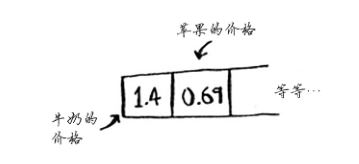

这个散列表的填装因子为1。

如果这个散列表只有50个位置呢？填充因子将为2。

不可能让每种商品都有自己的位置，因为没有足够的位置！填装因子大于1意味着商品数量超过了数组的位置数。一旦填装因子开始增大，你就需要在散列表中添加位置，这被称为调整长度（resizing）。


例如，假设有一个像下面这样相当满的散列表。

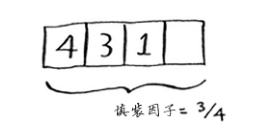

你就需要调整它的长度。为此，你首先创建一个更长的新数组：通常将数组增长一倍。

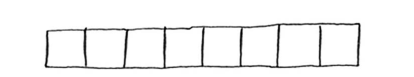

接下来，你需要使用函数hash将所有的元素都插入到这个新的散列表中。

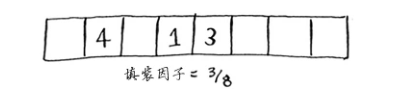

这个新散列表的填装因子为3/8，比原来低多了！填装因子越低，发生冲突的可能性越小，散列表的性能越高。

一个不错的经验规则是：一旦填装因子大于0.7，就调整散列表的长度。

良好的散列函数让数组中的值呈均匀分布。

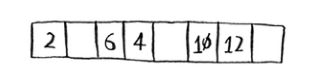

糟糕的散列函数让值扎堆，导致大量的冲突。

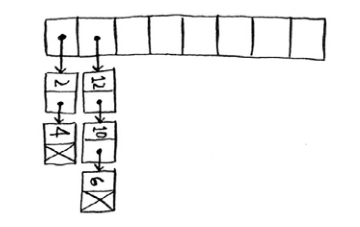

如果你好奇，可研究一下SHA函数（本书最后一章做了简要的介绍）。